In [1]:
import numpy as np
import pandas as pd
%config InlineBackend.figure_format= "retina"
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_mode_interactivity = "all"

In [2]:
from scipy import stats

In [3]:
import plotly.graph_objects as go
import plotly.express as px
import math
from scipy.stats import wilcoxon
import itertools


In [4]:
hurdat4 = pd.read_csv('hurdat2_MOD.csv')
hurdat4.head()

date  storm_id     name cat   lat  long  \
0  1851-06-25 00:00:00  AL011851  UNNAMED  HU  28.0 -94.8   
1  1851-06-25 06:00:00  AL011851  UNNAMED  HU  28.0 -95.4   
2  1851-06-25 12:00:00  AL011851  UNNAMED  HU  28.0 -96.0   
3  1851-06-25 18:00:00  AL011851  UNNAMED  HU  28.1 -96.5   
4  1851-06-25 21:00:00  AL011851  UNNAMED  HU  28.2 -96.8   

   max_sust_windspeed(knots)  min_pressure(millibars)  
0                         80                     -999  
1                         80                     -999  
2                         80                     -999  
3                         80                     -999  
4                         80                     -999

In [5]:
len(hurdat4.storm_id.unique())

1936

In [6]:
hurdat4.cat.unique()

array(['HU', 'TS', 'EX', 'TD', 'LO', 'DB', 'SD', 'SS', 'WV'], dtype=object)

In [7]:
hurdat4['year'] = hurdat4.date.str[:4]
hurdat4['year'] = hurdat4.year.astype('int')
hurdat4.head()

date  storm_id     name cat   lat  long  \
0  1851-06-25 00:00:00  AL011851  UNNAMED  HU  28.0 -94.8   
1  1851-06-25 06:00:00  AL011851  UNNAMED  HU  28.0 -95.4   
2  1851-06-25 12:00:00  AL011851  UNNAMED  HU  28.0 -96.0   
3  1851-06-25 18:00:00  AL011851  UNNAMED  HU  28.1 -96.5   
4  1851-06-25 21:00:00  AL011851  UNNAMED  HU  28.2 -96.8   

   max_sust_windspeed(knots)  min_pressure(millibars)  year  
0                         80                     -999  1851  
1                         80                     -999  1851  
2                         80                     -999  1851  
3                         80                     -999  1851  
4                         80                     -999  1851

In [17]:
hurdat4.dtypes

date                          object
storm_id                      object
name                          object
cat                           object
lat                          float64
long                         float64
max_sust_windspeed(knots)      int64
min_pressure(millibars)        int64
year                           int64
dtype: object

In [8]:
criteria = hurdat4[(hurdat4.iloc[:,-1]>=2004) & (hurdat4.iloc[:,-1]<=2020) & (hurdat4['cat']=='HU')]
criteria.head()

date  storm_id  name cat   lat  long  \
43728  2004-08-03 06:00:00  AL012004  ALEX  HU  33.0 -77.4   
43729  2004-08-03 12:00:00  AL012004  ALEX  HU  34.2 -76.4   
43730  2004-08-03 18:00:00  AL012004  ALEX  HU  35.3 -75.2   
43731  2004-08-04 00:00:00  AL012004  ALEX  HU  36.0 -73.7   
43732  2004-08-04 06:00:00  AL012004  ALEX  HU  36.8 -72.1   

       max_sust_windspeed(knots)  min_pressure(millibars)  year  
43728                         70                      983  2004  
43729                         85                      974  2004  
43730                         85                      972  2004  
43731                         80                      974  2004  
43732                         80                      973  2004

In [9]:

def pairwise(iterable):
    # pairwise('ABCDEFG') --> AB BC CD DE EF FG
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

k = list((pairwise(list(zip(criteria.lat, criteria.long)))))

In [10]:

def get_distance(pair):
    R = 6370
    point1 = pair[0]
    point2 = pair[1]
    lat1 = math.radians(point1[0])  #insert value
    lon1 = math.radians(point1[1])
    lat2 = math.radians(point2[0])
    lon2 = math.radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    return(distance)

In [11]:
sk = [0]

for i in k:
    sk.append(get_distance(i))

In [12]:
criteria['dist'] = sk

In [13]:
#forward motion
criteria['FM'] = criteria.dist/6
criteria.head()

date  storm_id  name cat   lat  long  \
43728  2004-08-03 06:00:00  AL012004  ALEX  HU  33.0 -77.4   
43729  2004-08-03 12:00:00  AL012004  ALEX  HU  34.2 -76.4   
43730  2004-08-03 18:00:00  AL012004  ALEX  HU  35.3 -75.2   
43731  2004-08-04 00:00:00  AL012004  ALEX  HU  36.0 -73.7   
43732  2004-08-04 06:00:00  AL012004  ALEX  HU  36.8 -72.1   

       max_sust_windspeed(knots)  min_pressure(millibars)  year        dist  \
43728                         70                      983  2004    0.000000   
43729                         85                      974  2004  162.398799   
43730                         85                      972  2004  164.229292   
43731                         80                      974  2004  156.267198   
43732                         80                      973  2004  168.550237   

              FM  
43728   0.000000  
43729  27.066466  
43730  27.371549  
43731  26.044533  
43732  28.091706

In [14]:
criteria.shape

(1977, 11)

In [15]:
hurdat = criteria.pivot(columns='storm_id', values='FM')
hurdat.head()


storm_id   AL012004  AL012010  AL012014  AL012016  AL022008  AL022018  \
43728      0.000000       NaN       NaN       NaN       NaN       NaN   
43729     27.066466       NaN       NaN       NaN       NaN       NaN   
43730     27.371549       NaN       NaN       NaN       NaN       NaN   
43731     26.044533       NaN       NaN       NaN       NaN       NaN   
43732     28.091706       NaN       NaN       NaN       NaN       NaN   

storm_id  AL022019  AL032004  AL032005  AL032009  ...  AL242005  AL252005  \
43728          NaN       NaN       NaN       NaN  ...       NaN       NaN   
43729          NaN       NaN       NaN       NaN  ...       NaN       NaN   
43730          NaN       NaN       NaN       NaN  ...       NaN       NaN   
43731          NaN       NaN       NaN       NaN  ...       NaN       NaN   
43732          NaN       NaN       NaN       NaN  ...       NaN       NaN   

storm_id  AL252020  AL262020  AL272005  AL272020  AL282020  AL292020  \
43728          NaN       NaN       NaN       NaN       NaN       NaN   
43729          NaN       NaN       NaN       NaN       NaN       NaN   
43730          NaN       NaN       NaN       NaN       NaN       NaN   
43731          NaN       NaN       NaN       NaN       NaN       NaN   
43732          NaN       NaN       NaN       NaN       NaN       NaN   

storm_id  AL302005  AL312020  
43728          NaN       NaN  
43729          NaN       NaN  
43730          NaN       NaN  
43731          NaN       NaN  
43732          NaN       NaN  

[5 rows x 132 columns]

In [16]:
hurdat.head(35)

storm_id   AL012004  AL012010  AL012014  AL012016  AL022008  AL022018  \
43728      0.000000       NaN       NaN       NaN       NaN       NaN   
43729     27.066466       NaN       NaN       NaN       NaN       NaN   
43730     27.371549       NaN       NaN       NaN       NaN       NaN   
43731     26.044533       NaN       NaN       NaN       NaN       NaN   
43732     28.091706       NaN       NaN       NaN       NaN       NaN   
43733     29.585769       NaN       NaN       NaN       NaN       NaN   
43734     29.409002       NaN       NaN       NaN       NaN       NaN   
43735     35.935696       NaN       NaN       NaN       NaN       NaN   
43736     45.683799       NaN       NaN       NaN       NaN       NaN   
43737     55.108318       NaN       NaN       NaN       NaN       NaN   
43738     72.670980       NaN       NaN       NaN       NaN       NaN   
43739     83.417409       NaN       NaN       NaN       NaN       NaN   
43740     72.765169       NaN       NaN       NaN       NaN       NaN   
43796           NaN       NaN       NaN       NaN       NaN       NaN   
43797           NaN       NaN       NaN       NaN       NaN       NaN   
43798           NaN       NaN       NaN       NaN       NaN       NaN   
43799           NaN       NaN       NaN       NaN       NaN       NaN   
43800           NaN       NaN       NaN       NaN       NaN       NaN   
43801           NaN       NaN       NaN       NaN       NaN       NaN   
43802           NaN       NaN       NaN       NaN       NaN       NaN   
43803           NaN       NaN       NaN       NaN       NaN       NaN   
43804           NaN       NaN       NaN       NaN       NaN       NaN   
43805           NaN       NaN       NaN       NaN       NaN       NaN   
43806           NaN       NaN       NaN       NaN       NaN       NaN   
43807           NaN       NaN       NaN       NaN       NaN       NaN   
43808           NaN       NaN       NaN       NaN       NaN       NaN   
43809           NaN       NaN       NaN       NaN       NaN       NaN   
43810           NaN       NaN       NaN       NaN       NaN       NaN   
43811           NaN       NaN       NaN       NaN       NaN       NaN   
43812           NaN       NaN       NaN       NaN       NaN       NaN   
43823           NaN       NaN       NaN       NaN       NaN       NaN   
43824           NaN       NaN       NaN       NaN       NaN       NaN   
43825           NaN       NaN       NaN       NaN       NaN       NaN   
43826           NaN       NaN       NaN       NaN       NaN       NaN   
43827           NaN       NaN       NaN       NaN       NaN       NaN   

storm_id  AL022019    AL032004  AL032005  AL032009  ...  AL242005  AL252005  \
43728          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43729          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43730          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43731          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43732          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43733          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43734          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43735          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43736          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43737          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43738          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43739          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43740          NaN         NaN       NaN       NaN  ...       NaN       NaN   
43796          NaN  740.302050       NaN       NaN  ...       NaN       NaN   
43797          NaN   26.431005       NaN       NaN  ...       NaN       NaN   
43798          NaN   25.844613       NaN       NaN  ...       NaN       NaN   
43799          NaN   30.7750

In [17]:
hurdat.isnull().sum()

storm_id
AL012004    1964
AL012010    1969
AL012014    1966
AL012016    1972
AL022008    1946
            ... 
AL272020    1958
AL282020    1966
AL292020    1966
AL302005    1957
AL312020    1966
Length: 132, dtype: int64

In [18]:
res = pd.concat([hurdat[x].dropna().reset_index(drop=True) for x in hurdat], axis=1)

res.head()

AL012004    AL012010    AL012014    AL012016    AL022008    AL022018  \
0   0.000000  139.365663  310.507714  465.963652  451.313241  776.281809   
1  27.066466    7.067328   14.909390   31.318907   23.411096   25.766590   
2  27.371549   10.063558   17.339135   33.379102   18.234436   23.745901   
3  26.044533   10.569996   21.833532   26.672394    9.065687   18.304415   
4  28.091706   13.075885   25.582322   28.455200    7.617733   19.646926   

     AL022019    AL032004    AL032005    AL032009  ...     AL242005  \
0  624.363309  740.302050  801.067490  629.255598  ...  1266.784759   
1    7.371039   26.431005   13.370684   26.270507  ...          NaN   
2         NaN   25.844613         NaN   26.806149  ...          NaN   
3         NaN   30.775044         NaN   27.899291  ...          NaN   
4         NaN   28.745119         NaN   28.394855  ...          NaN   

      AL252005    AL252020    AL262020    AL272005    AL272020    AL282020  \
0  1065.752359  540.455044  149.315197  576.774097  590.426568  681.442856   
1    16.036144         NaN   18.454699    4.049988   23.972130   14.348507   
2    12.430113         NaN   26.387562    9.001196   16.655065   18.276089   
3    10.260651         NaN   26.309248    9.191810   16.348185   18.234436   
4    11.989890         NaN   27.186378   10.587413   13.435744   16.718237   

     AL292020    AL302005    AL312020  
0  326.428424  713.799926  265.133430  
1   14.447859   14.338964   16.351239  
2   14.454414   14.250354   16.344685  
3   11.635723   18.324746   16.235998  
4    9.085877   19.851788   16.647058  

[5 rows x 132 columns]

In [19]:
res = res[1:]
res.head()

AL012004   AL012010   AL012014   AL012016   AL022008   AL022018  AL022019  \
1  27.066466   7.067328  14.909390  31.318907  23.411096  25.766590  7.371039   
2  27.371549  10.063558  17.339135  33.379102  18.234436  23.745901       NaN   
3  26.044533  10.569996  21.833532  26.672394   9.065687  18.304415       NaN   
4  28.091706  13.075885  25.582322  28.455200   7.617733  19.646926       NaN   
5  29.585769  18.576662  16.819972        NaN  15.256515        NaN       NaN   

    AL032004   AL032005   AL032009  ...  AL242005   AL252005  AL252020  \
1  26.431005  13.370684  26.270507  ...       NaN  16.036144       NaN   
2  25.844613        NaN  26.806149  ...       NaN  12.430113       NaN   
3  30.775044        NaN  27.899291  ...       NaN  10.260651       NaN   
4  28.745119        NaN  28.394855  ...       NaN  11.989890       NaN   
5  24.535625        NaN  24.366880  ...       NaN  10.772453       NaN   

    AL262020   AL272005   AL272020   AL282020   AL292020   AL302005   AL312020  
1  18.454699   4.049988  23.972130  14.348507  14.447859  14.338964  16.351239  
2  26.387562   9.001196  16.655065  18.276089  14.454414  14.250354  16.344685  
3  26.309248   9.191810  16.348185  18.234436  11.635723  18.324746  16.235998  
4  27.186378  10.587413  13.435744  16.718237   9.085877  19.851788  16.647058  
5  27.093253  10.346408  15.258082   9.436236   8.239391  21.722860  14.535678  

[5 rows x 132 columns]

In [20]:
fig = px.line(res, y=res.columns, title='Forward Motion of Hurricanes: 2018-2020')
fig.show()

In [22]:
fig = px.line(hurdat, y=hurdat.columns, title='Forward Motion of Hurricane')
fig.show()

In [31]:
res.columns

Index(['AL022018', 'AL022019', 'AL032018', 'AL052019', 'AL062018', 'AL082018',
       'AL082020', 'AL092018', 'AL092019', 'AL092020', 'AL102019', 'AL132018',
       'AL132019', 'AL132020', 'AL142018', 'AL142020', 'AL162018', 'AL162020',
       'AL172020', 'AL182019', 'AL192020', 'AL202020', 'AL252020', 'AL262020',
       'AL272020', 'AL282020', 'AL292020', 'AL312020'],
      dtype='object')

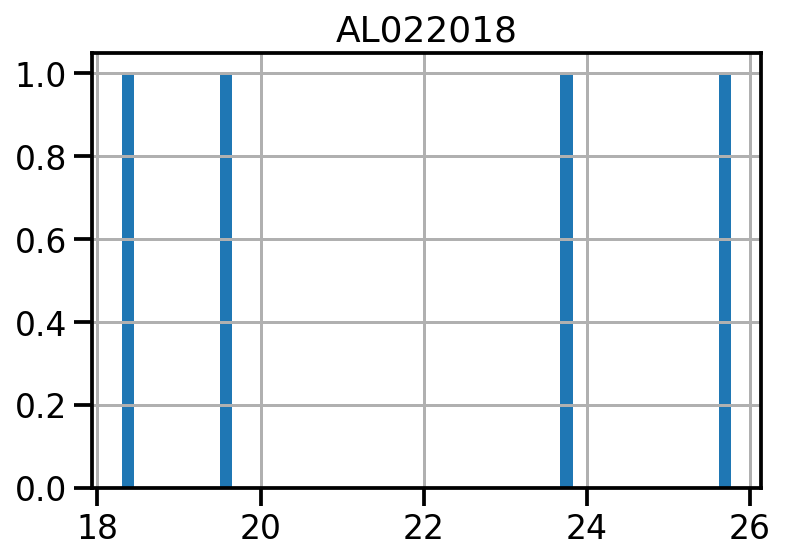

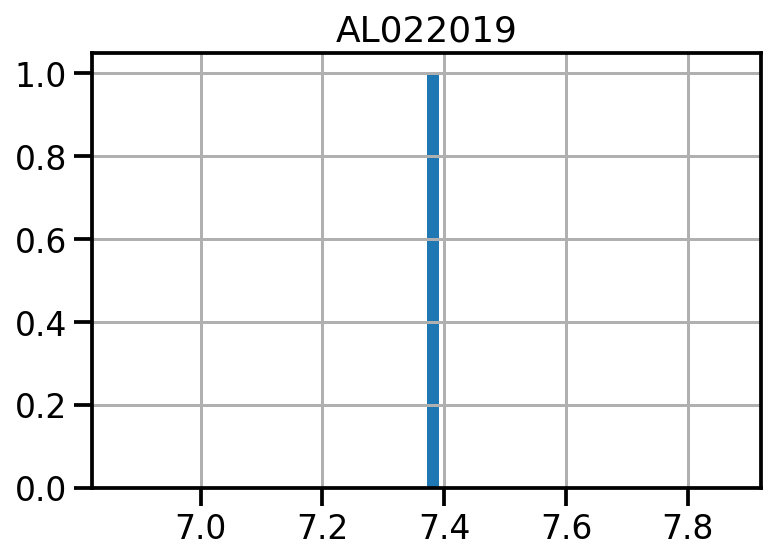

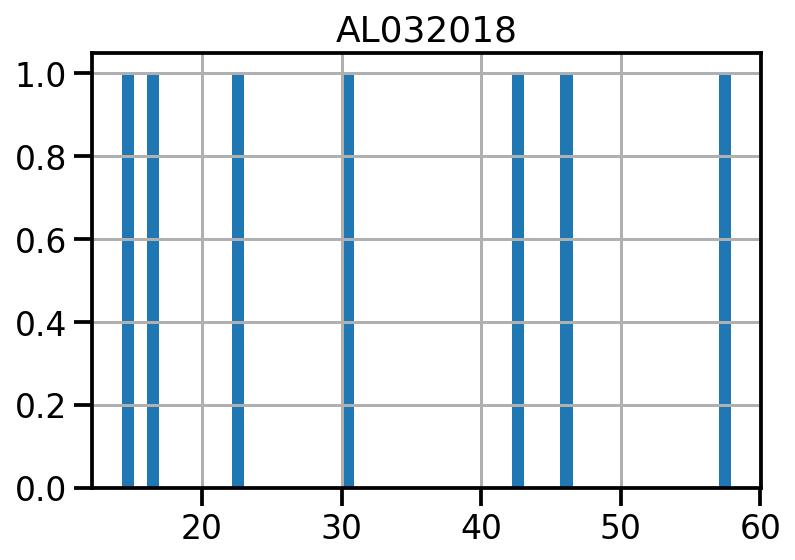

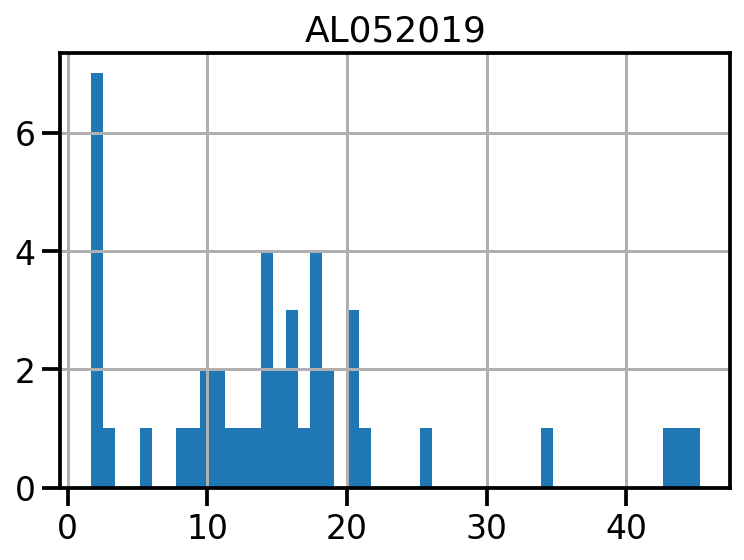

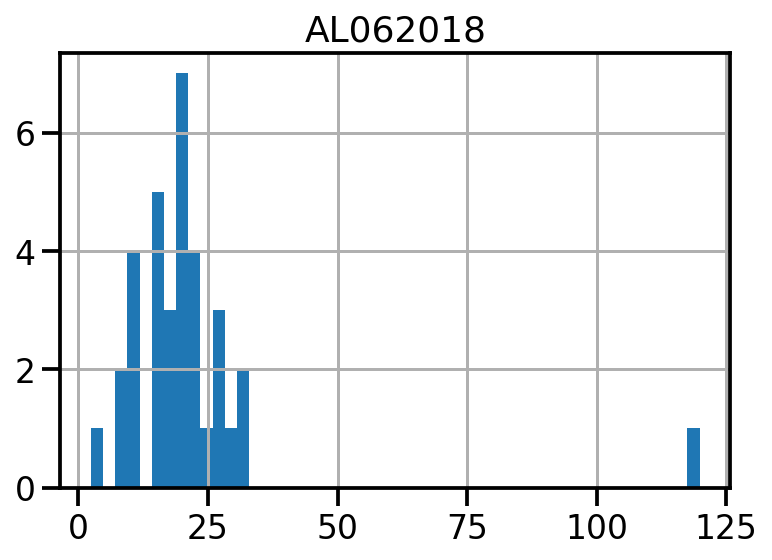

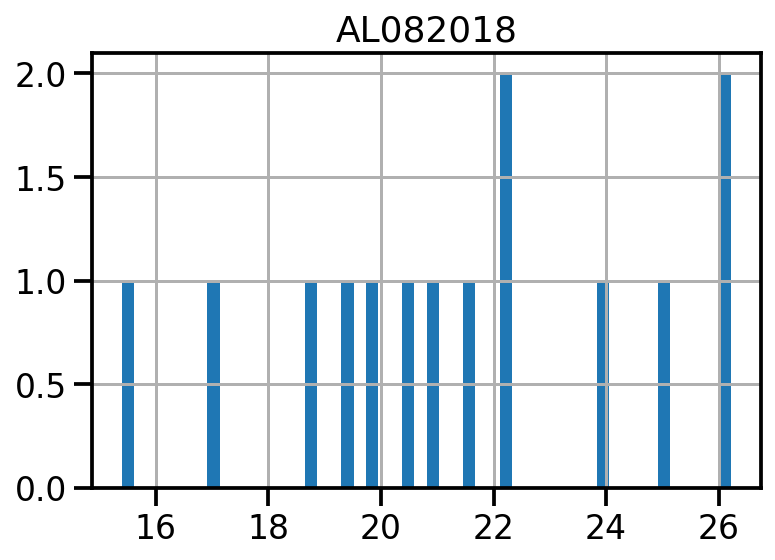

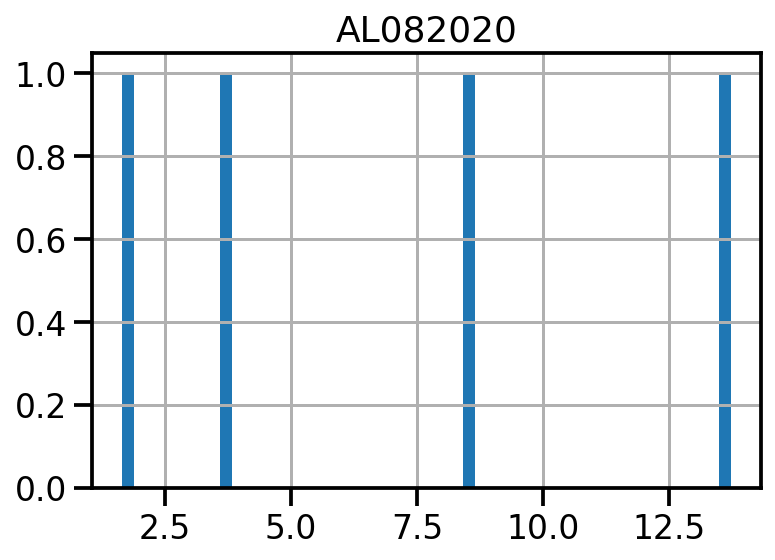

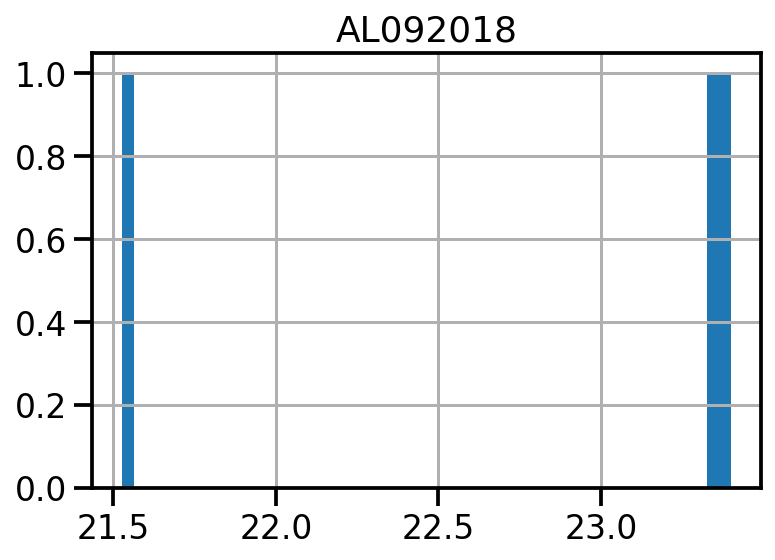

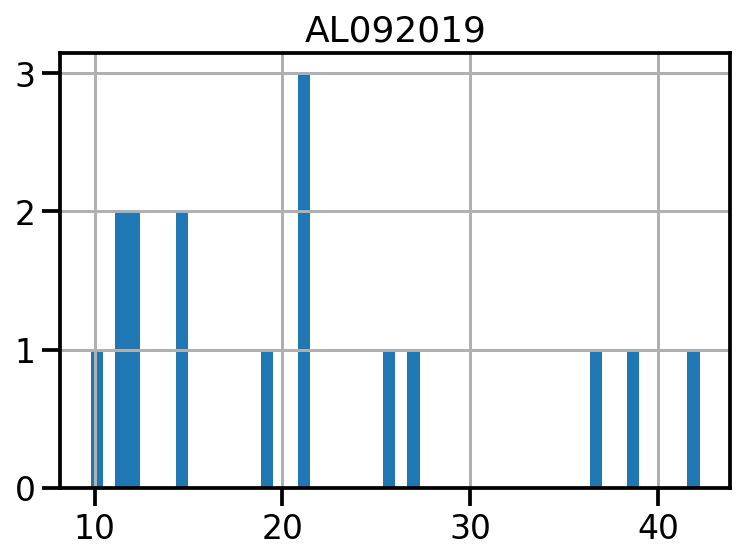

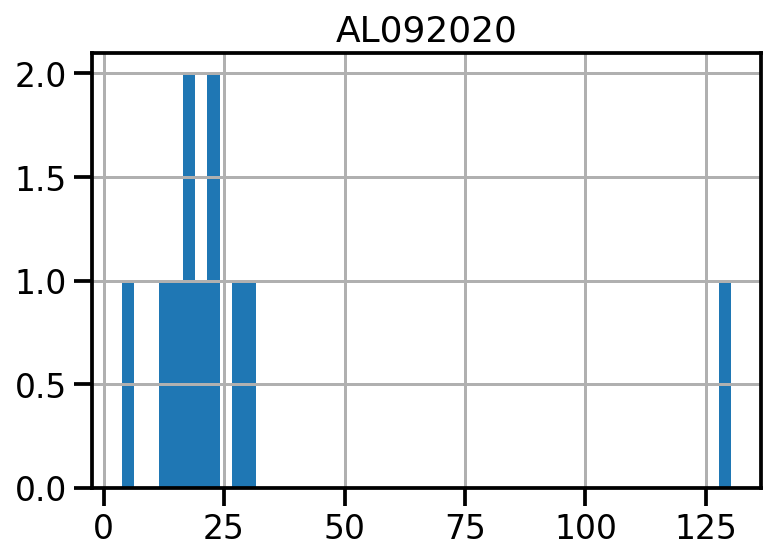

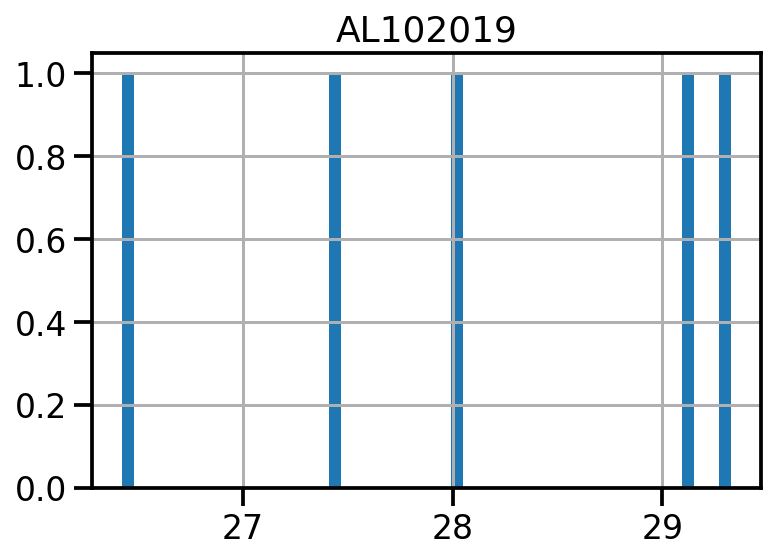

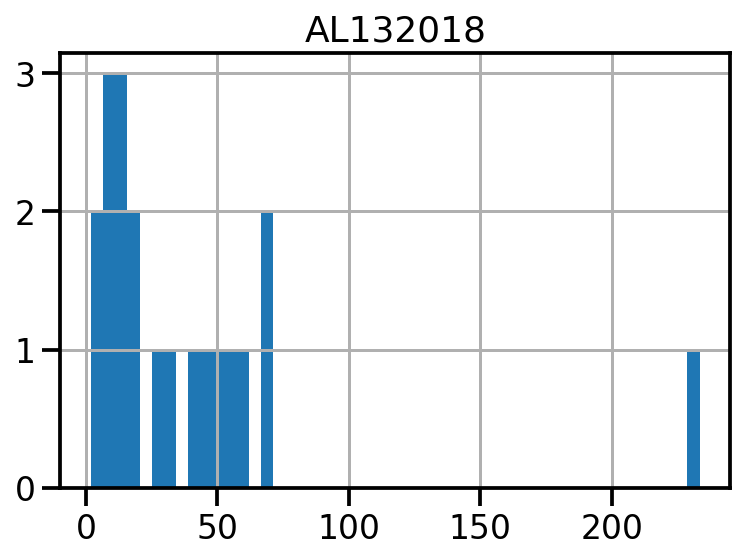

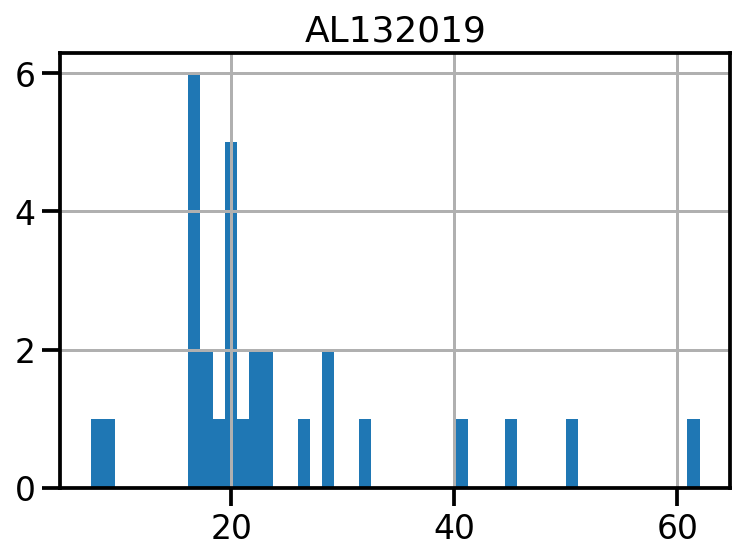

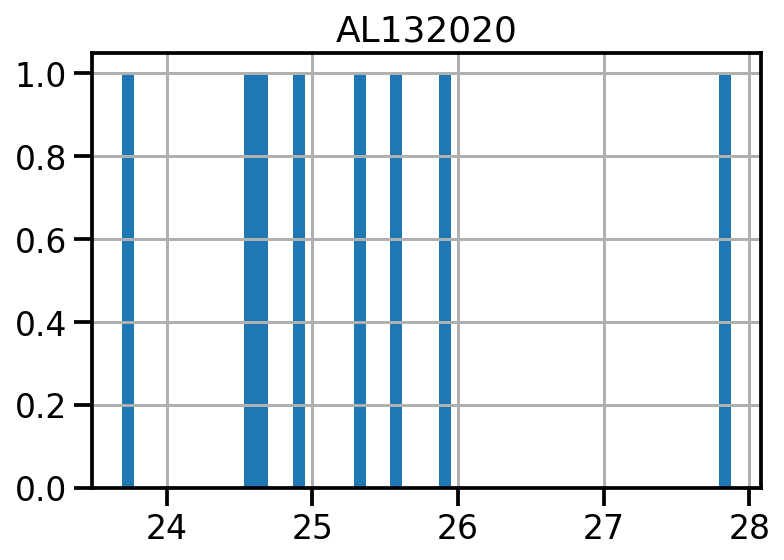

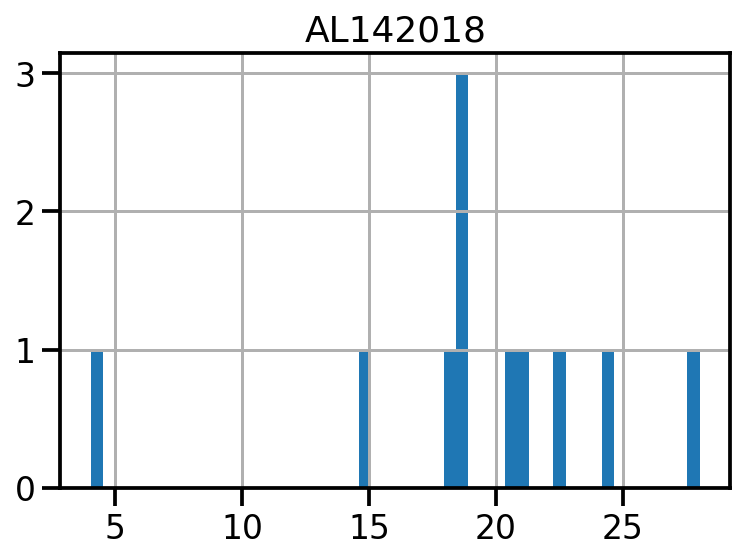

In [32]:
#Plot to see if it is normally distributed. It does not appear to be

storms = ['AL022018', 'AL022019', 'AL032018', 'AL052019', 'AL062018', 'AL082018',
       'AL082020', 'AL092018', 'AL092019', 'AL092020', 'AL102019', 'AL132018',
       'AL132019', 'AL132020', 'AL142018']
for i in storms:
    res.hist(column=i, bins=50);

In [ ]:
#Plot to see if it is normally distributed. It does not appear to be

for i in storms:
    hurdat.hist(column=i, bins=50);

In [74]:
res.columns

Index(['AL022018', 'AL022019', 'AL032018', 'AL052019', 'AL062018', 'AL082018',
       'AL082020', 'AL092018', 'AL092019', 'AL092020', 'AL102019', 'AL132018',
       'AL132019', 'AL132020', 'AL142018', 'AL142020', 'AL162018', 'AL162020',
       'AL172020', 'AL182019', 'AL192020', 'AL202020', 'AL252020', 'AL262020',
       'AL272020', 'AL282020', 'AL292020', 'AL312020'],
      dtype='object')

In [33]:
#Run Shapiro Wilks test
#A pvalue is greater than 0.05 suggests the data is normally distributed
for i in res.columns:
    try:
        hj = res[i].dropna()
        g = stats.shapiro(res[i][1:])
        print(i)
        print(g, '\n')
    except:
        pass

AL022018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL022019
ShapiroResult(statistic=nan, pvalue=1.0) 

AL032018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL052019
ShapiroResult(statistic=0.8712698221206665, pvalue=0.0002212111430708319) 

AL062018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL082018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL082020
ShapiroResult(statistic=nan, pvalue=1.0) 

AL092018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL092019
ShapiroResult(statistic=nan, pvalue=1.0) 

AL092020
ShapiroResult(statistic=nan, pvalue=1.0) 

AL102019
ShapiroResult(statistic=nan, pvalue=1.0) 

AL132018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL132019
ShapiroResult(statistic=nan, pvalue=1.0) 

AL132020
ShapiroResult(statistic=nan, pvalue=1.0) 

AL142018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL142020
ShapiroResult(statistic=nan, pvalue=1.0) 

AL162018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL162020
ShapiroResult(statistic=nan, pvalue=1.0) 

AL172020
ShapiroResult(statisti

In [34]:
#ShapiroResult(statistic=nan, pvalue=1.0) Looks like a false result even though pvalue is >0.05

for i in res.columns:
    #Kolmogorv Smmirnoff test
    try:
        hj = res[i].dropna()
        g = stats.kstest(hj, stats.norm.cdf)
        print(i)
        print(g, '\n')
    except:
        pass

AL022018
KstestResult(statistic=1.0, pvalue=0.0) 

AL022019
KstestResult(statistic=0.9999999999999154, pvalue=1.6919798895287386e-13) 

AL032018
KstestResult(statistic=1.0, pvalue=0.0) 

AL052019
KstestResult(statistic=0.9512230856913068, pvalue=7.83873309299432e-57) 

AL062018
KstestResult(statistic=0.991917937697912, pvalue=1.4347776083238761e-71) 

AL082018
KstestResult(statistic=1.0, pvalue=0.0) 

AL082020
KstestResult(statistic=0.9510762311401887, pvalue=1.1458021119029852e-05) 

AL092018
KstestResult(statistic=1.0, pvalue=0.0) 

AL092019
KstestResult(statistic=1.0, pvalue=0.0) 

AL092020
KstestResult(statistic=0.9999412540748333, pvalue=5.751554251991275e-47) 

AL102019
KstestResult(statistic=1.0, pvalue=0.0) 

AL132018
KstestResult(statistic=0.9680558026550775, pvalue=2.448327999445556e-30) 

AL132019
KstestResult(statistic=0.9999999999999377, pvalue=0.0) 

AL132020
KstestResult(statistic=1.0, pvalue=0.0) 

AL142018
KstestResult(statistic=0.9999730207714633, pvalue=1.10243956870

# Test to see if Shapiro test is giving the right answers

In [48]:
stat, p = stats.shapiro(res['AL012018'][1:])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=nan, p=1.000


In [29]:
from scipy import stats

rng = np.random.default_rng()

x = stats.norm.rvs(loc=5, scale=3, size=100, random_state=rng)

shapiro_test = stats.shapiro(x)

shapiro_test

ShapiroResult(statistic=0.9785686731338501, pvalue=0.1027623862028122)

In [30]:
shapiro_test.statistic

0.9785686731338501

In [31]:
shapiro_test.pvalue

0.1027623862028122

# Graph outliers

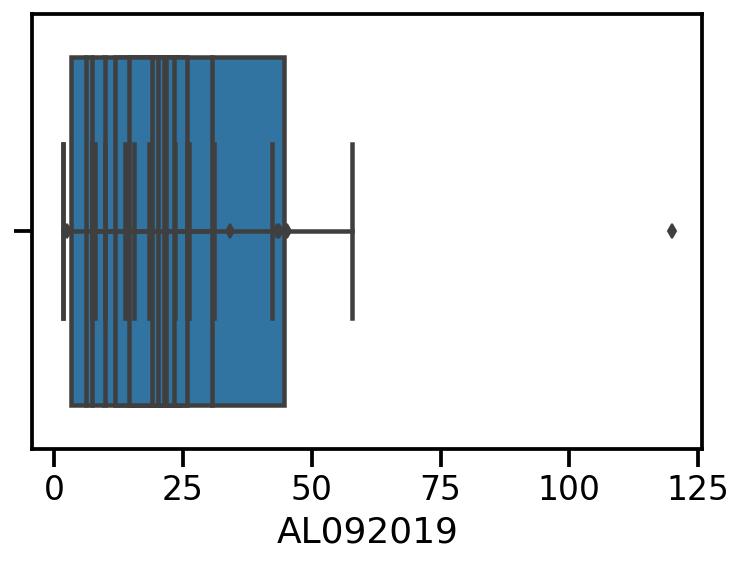

In [35]:
#Check outliers in sample
storms = ['AL022018', 'AL022019', 'AL032018', 'AL052019', 'AL062018', 'AL082018',
       'AL082020', 'AL092018', 'AL092019']
for i in storms:
    sns.boxplot(x=res[i])

<AxesSubplot:xlabel='AL052019'>

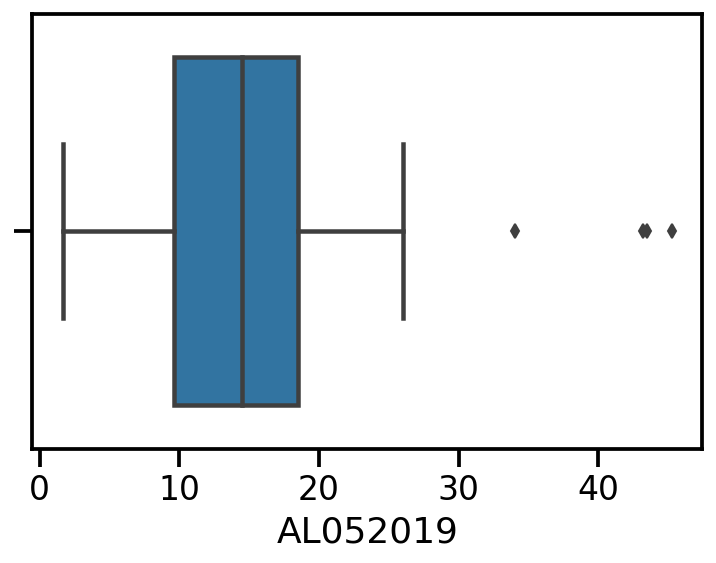

In [36]:
sns.boxplot(x=res['AL052019'])

<AxesSubplot:xlabel='AL062018'>

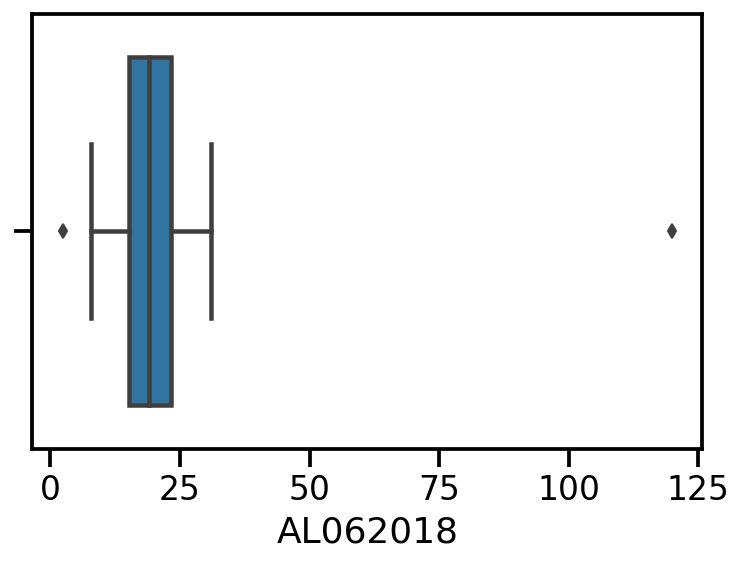

In [37]:
sns.boxplot(x=res['AL062018'])

<AxesSubplot:xlabel='AL082020'>

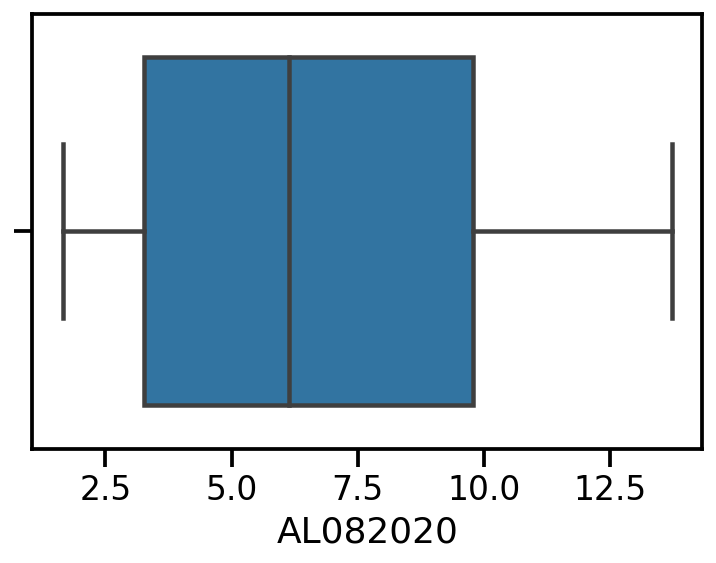

In [38]:
sns.boxplot(x=res['AL082020'])

In [39]:
#Calculate interquartile range
Q1 = res.quantile(0.25)
Q3 = res.quantile(0.75)
IQR = Q3-Q1
IQR

AL022018     4.939775
AL022019     0.000000
AL032018    24.915860
AL052019     8.879038
AL062018     8.134746
AL082018     4.142614
AL082020     6.524423
AL092018     0.936331
AL092019    13.920319
AL092020     9.715577
AL102019     1.639527
AL132018    40.487543
AL132019     9.968110
AL132020     1.022179
AL142018     3.569560
AL142020     0.000000
AL162018    13.168359
AL162020     0.000000
AL172020    20.326991
AL182019     0.000000
AL192020     1.549170
AL202020     4.768860
AL252020          NaN
AL262020     7.504389
AL272020    10.278375
AL282020    11.199104
AL292020     8.647486
AL312020     3.155178
dtype: float64

In [40]:
#Remove outliers
df2 =res[~((res<(Q1-1.5*IQR))|(res>(Q3+1.5*IQR))).any(axis=1)]

<AxesSubplot:xlabel='AL052019'>

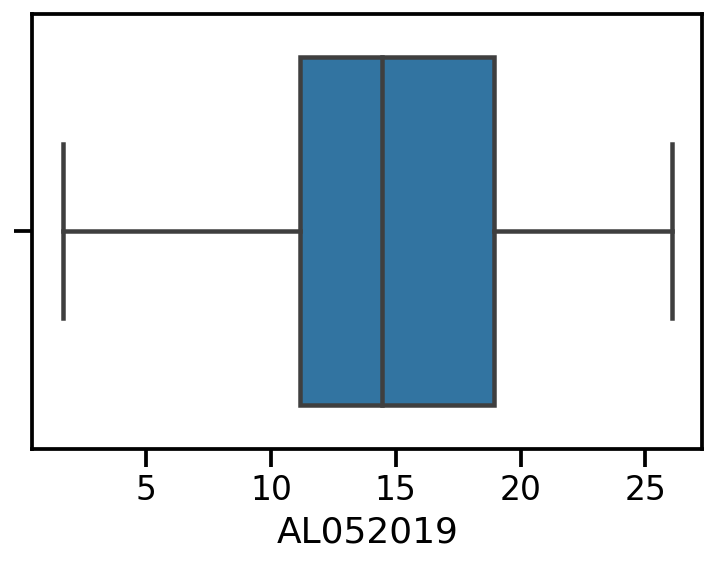

In [41]:
#Outliers are gone
sns.boxplot(x=df2['AL052019'])

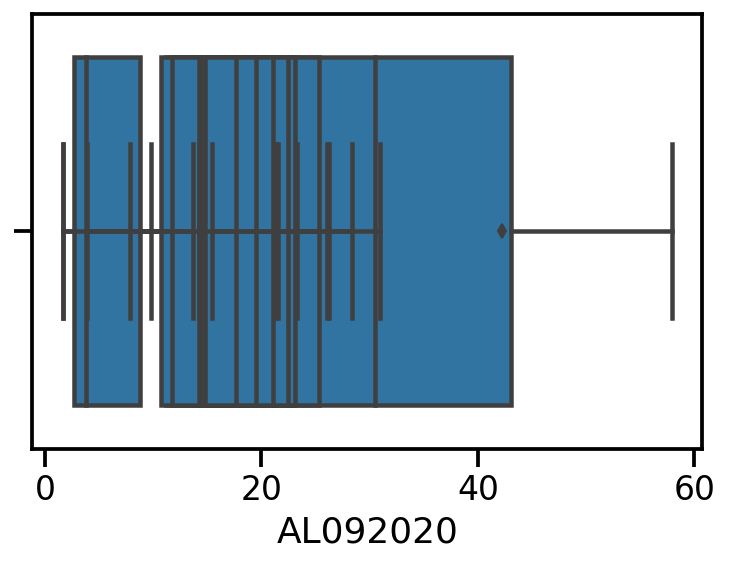

In [42]:
storms = ['AL032018', 'AL052019', 'AL062018', 'AL082018','AL082020', 'AL092018', 'AL092019', 'AL092020']
for i in storms:
    sns.boxplot(x=df2[i])

In [43]:
#Run Shapiro Wilks test
#A pvalue is greater than 0.05 suggests the data is normally distributed
#Two normally distributed results are detected
for i in res.columns:
    g = stats.shapiro(df2[i][1:])
    print(i)
    print(g, '\n')

AL022018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL022019
ShapiroResult(statistic=nan, pvalue=1.0) 

AL032018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL052019
ShapiroResult(statistic=0.9484285116195679, pvalue=0.31801554560661316) 

AL062018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL082018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL082020
ShapiroResult(statistic=nan, pvalue=1.0) 

AL092018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL092019
ShapiroResult(statistic=nan, pvalue=1.0) 

AL092020
ShapiroResult(statistic=nan, pvalue=1.0) 

AL102019
ShapiroResult(statistic=nan, pvalue=1.0) 

AL132018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL132019
ShapiroResult(statistic=nan, pvalue=1.0) 

AL132020
ShapiroResult(statistic=nan, pvalue=1.0) 

AL142018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL142020
ShapiroResult(statistic=nan, pvalue=1.0) 

AL162018
ShapiroResult(statistic=nan, pvalue=1.0) 

AL162020
ShapiroResult(statistic=nan, pvalue=1.0) 

AL172020
ShapiroResult(statistic=

In [47]:
#kstest(statistic=nan, pvalue=1.0) Accept is pvalue is >0.05

for i in res.columns:
    #Kolmogorv Smmirnoff test
    g = stats.kstest(df2[i], stats.norm.cdf)
    print(i)
    print(g, '\n')

AL022018
KstestResult(statistic=nan, pvalue=nan) 

AL022019
KstestResult(statistic=nan, pvalue=nan) 

AL032018
KstestResult(statistic=nan, pvalue=nan) 

AL052019
KstestResult(statistic=0.9512230856913068, pvalue=2.765318107831554e-29) 

AL062018
KstestResult(statistic=nan, pvalue=nan) 

AL082018
KstestResult(statistic=nan, pvalue=nan) 

AL082020
KstestResult(statistic=nan, pvalue=nan) 

AL092018
KstestResult(statistic=nan, pvalue=nan) 

AL092019
KstestResult(statistic=nan, pvalue=nan) 

AL092020
KstestResult(statistic=nan, pvalue=nan) 

AL102019
KstestResult(statistic=nan, pvalue=nan) 

AL132018
KstestResult(statistic=nan, pvalue=nan) 

AL132019
KstestResult(statistic=nan, pvalue=nan) 

AL132020
KstestResult(statistic=nan, pvalue=nan) 

AL142018
KstestResult(statistic=nan, pvalue=nan) 

AL142020
KstestResult(statistic=nan, pvalue=nan) 

AL162018
KstestResult(statistic=nan, pvalue=nan) 

AL162020
KstestResult(statistic=nan, pvalue=nan) 

AL172020
KstestResult(statistic=nan, pvalue=nan) 

In [48]:
#Lets make ND data from the distributions
import random
def critical_limit(df, n, p):
    samples = []
    dp = df.dropna()
    dg = len(dp)
    for c in range(p):
        #Get a random sample
        randomlist = []
        for i in range(n):
            m = random.randint(1, dg)
            s = df[m]
            randomlist.append(s)
        #remove zeros
        #mean of sample
        randomean = sum(randomlist)/len(randomlist)
        samples.append(randomean)
    sample2 = pd.DataFrame({'index':len(samples), 'value':samples})
    g = stats.shapiro(sample2['value'])
    try:
        if 0.05 <= g[1]:
            print('True')
            return(sample2)
    except:
        print(g[1])
    
#number of samples
n = 30
p = 50

In [49]:
#Convert to critical_limit_theorem and Run Shapiro Wilks test
#A pvalue is greater than 0.05 suggests the data is normally distributed

df_ = {}
for i in res.columns:
    gh = critical_limit(res[i], n, p)
    try:
        df_[i]=gh['value']
    except:
        pass


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


ValueError: empty range for randrange() (1,1, 0)

In [50]:
df8 = pd.DataFrame(df_, columns=res.columns)

In [51]:
df8.head()

AL022018  AL022019   AL032018   AL052019   AL062018   AL082018  AL082020  \
0  23.508249  7.371039  37.415629  14.765727  22.940948  21.033795  7.240620   
1  20.763515  7.371039  33.198056  12.439753  17.895092  21.160706  7.713953   
2  22.262633  7.371039  29.626176  14.306248  18.081029  20.526968  7.213712   
3  22.238107  7.371039  36.384975  16.267245  21.038978  21.442413  7.732905   
4  22.717281  7.371039  39.429908  16.813424  26.434918  21.268837  6.435508   

    AL092018   AL092019   AL092020  ...   AL172020   AL182019  AL192020  \
0  22.884579  20.669415  18.979520  ...  21.747870  45.550026  5.921044   
1  22.926529  21.306705  34.310576  ...  26.549694  45.550026  6.104812   
2  22.690489  20.347468  26.133039  ...  26.216143  45.550026  6.127586   
3  22.815333  19.999050  26.903976  ...  27.090868  45.550026  5.599256   
4  22.942452  22.484055  27.433001  ...  23.388687  45.550026  6.083872   

    AL202020  AL252020  AL262020  AL272020  AL282020  AL292020  AL312020  
0  25.249663       NaN       NaN       NaN       NaN       NaN       NaN  
1  20.422024       NaN       NaN       NaN       NaN       NaN       NaN  
2  22.566131       NaN       NaN       NaN       NaN       NaN       NaN  
3  22.691355       NaN       NaN       NaN       NaN       NaN       NaN  
4  22.673801       NaN       NaN       NaN       NaN       NaN       NaN  

[5 rows x 28 columns]

In [52]:
df8.tail()

AL022018  AL022019   AL032018   AL052019   AL062018   AL082018  AL082020  \
45  20.922754  7.371039  36.372689  14.922397  19.382498  20.832036  7.868961   
46  21.740167  7.371039  36.524684  15.305562  18.826591  21.434952  5.254631   
47  20.858240  7.371039  33.524590  12.982834  16.634597  21.471775  7.602930   
48  21.809905  7.371039  34.425387  14.697432  17.693845  20.910372  6.540096   
49  22.236187  7.371039  35.370247  15.880824  18.200250  20.870698  6.397605   

     AL092018   AL092019   AL092020  ...   AL172020   AL182019  AL192020  \
45  22.873206  21.517091  39.053704  ...  26.045089  45.550026  5.525434   
46  22.574744  19.954954  31.239729  ...  27.509349  45.550026  5.946614   
47  22.752911  19.760219  25.218003  ...  23.154895  45.550026  5.962995   
48  22.628067  21.040060  33.416681  ...  30.149916  45.550026  5.411328   
49  22.563371  23.704260  28.788495  ...  32.628017  45.550026  5.932570   

     AL202020  AL252020  AL262020  AL272020  AL282020  AL292020  AL312020  
45  20.894260       NaN       NaN       NaN       NaN       NaN       NaN  
46  23.894757       NaN       NaN       NaN       NaN       NaN       NaN  
47  21.670636       NaN       NaN       NaN       NaN       NaN       NaN  
48  22.515210       NaN       NaN       NaN       NaN       NaN       NaN  
49  23.591355       NaN       NaN       NaN       NaN       NaN       NaN  

[5 rows x 28 columns]

In [53]:
df8.dropna(axis=1, how='all')

AL022018  AL022019   AL032018   AL052019   AL062018   AL082018  AL082020  \
0   23.508249  7.371039  37.415629  14.765727  22.940948  21.033795  7.240620   
1   20.763515  7.371039  33.198056  12.439753  17.895092  21.160706  7.713953   
2   22.262633  7.371039  29.626176  14.306248  18.081029  20.526968  7.213712   
3   22.238107  7.371039  36.384975  16.267245  21.038978  21.442413  7.732905   
4   22.717281  7.371039  39.429908  16.813424  26.434918  21.268837  6.435508   
5   22.105314  7.371039  34.999499  15.619788  22.197744  21.542321  7.395628   
6   20.472407  7.371039  26.476631  14.939870  23.247471  21.959004  6.597888   
7   22.058644  7.371039  36.284003  15.242517  21.418993  21.106407  6.195800   
8   22.285239  7.371039  35.609327  18.016118  21.258036  21.539479  6.422054   
9   21.514034  7.371039  28.978933  17.114450  19.399175  21.168609  5.637768   
10  22.148145  7.371039  33.358660  15.078687  18.983655  21.981306  6.813146   
11  21.765616  7.371039  37.932357  18.266048  20.540227  21.060492  6.351745   
12  22.148606  7.371039  35.587129  12.689141  22.278241  21.070384  7.907801   
13  21.355257  7.371039  36.208100  15.051364  18.239999  21.062240  6.573439   
14  22.578728  7.371039  34.304653  14.414358  23.378011  20.971855  7.726470   
15  21.944618  7.371039  30.735168  15.513039  21.503153  22.247231  6.630293   
16  20.904449  7.371039  30.025600  16.973905  21.573445  21.085794  7.383111   
17  21.422613  7.371039  36.434119  16.661652  21.343060  22.434528  8.012390   
18  21.561166  7.371039  30.255348  14.767590  26.013663  21.808358  7.519168   
19  22.079330  7.371039  32.686677  13.692966  20.968106  22.058450  7.221669   
20  21.879643  7.371039  32.078607  13.423947  17.889800  22.047598  8.116041   
21  21.265295  7.371039  32.678018  17.549719  21.546609  21.071539  6.592390   
22  22.329528  7.371039  27.540478  12.729895  27.867655  21.027532  6.072260   
23  21.830591  7.371039  36.039734  17.199108  19.448510  21.986554  5.910818   
24  22.646085  7.371039  30.920900  14.302096  23.603643  21.091312  5.352785   
25  21.766613  7.371039  33.906689  19.209972  20.626075  20.842114  5.560087   
26  21.626602  7.371039  31.038780  12.164226  22.023145  21.660458  6.545594   
27  21.193637  7.371039  30.748070  13.863984  21.081810  21.458504  8.323343   
28  22.285239  7.371039  32.218267  15.619603  22.095306  21.009713  6.138008   
29  21.173874  7.371039  37.689698  15.232119  19.453064  21.614079  7.434468   
30  22.036038  7.371039  28.101678  16.170254  17.891116  22.138496  7.260509   
31  22.760111  7.371039  31.198914  12.790528  19.273288  21.842364  8.601890   
32  21.083912  7.371039  32.909783  14.807070  23.173095  21.698231  6.182346   
33  21.718484  7.371039  34.757049  12.905552  27.092685  21.703483  9.510654   
34  22.511372  7.371039  34.808837  16.852841  16.429575  20.934744  5.877475   
35  21.854655  7.371039  28.465785  12.234342  18.223497  21.040138  7.416454   
36  22.396884  7.371039  35.789817  16.672559  21.049007  21.309093  8.096152   
37  21.194099  7.371039  30.550300  19.218275  23.375896  20.408187  7.642708   
38  22.148145  7.371039  30.155719  14.575155  18.625176  20.615520  6.299451   
39  22.329989  7.371039  28.659718  17.777953  19.686769  20.664023  6.247157   
40  21.899867  7.371039  36.108481  15.025051  22.222504  20.963459  8.426994   
41  22.533517  7.371039  32.207791  15.831288  24.912014  20.014658  6.767287   
42  22.309303  7.371039  31.890393  13.971897  23.506088  22.108997  6.766350   
43  22.013894  7.371039  31.764469  13.212624  21.314403  21.196887  6.597888   
44  21.561166  7.371039  25.720059  18.475884  17.980168  20.849649  6.312905   
45  20.922754  7.371039  36.372689  14.922397  19.382498  20.832036  7.868961   
46  21.740167  7.371039  36.524684  15.305562  18.826591  21.434952  5.254631   
47  20.858240  7.371039  33.524590  12.982834  16.634597  21.471775  7.602930   
48  21.809905  7.371039  34.425387  

In [54]:
df8.dtypes

AL022018    float64
AL022019    float64
AL032018    float64
AL052019    float64
AL062018    float64
AL082018    float64
AL082020    float64
AL092018    float64
AL092019    float64
AL092020    float64
AL102019    float64
AL132018    float64
AL132019    float64
AL132020    float64
AL142018    float64
AL142020    float64
AL162018    float64
AL162020    float64
AL172020    float64
AL182019    float64
AL192020    float64
AL202020    float64
AL252020     object
AL262020     object
AL272020     object
AL282020     object
AL292020     object
AL312020     object
dtype: object

In [55]:
df9 = df8.select_dtypes(exclude=['object'])

In [56]:
fig = px.line(df9)
fig.show()

In [111]:
#pip install pingouin

     |████████████████████████████████| 185 kB 3.9 MB/s eta 0:00:01
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
     |████████████████████████████████| 845 kB 5.4 MB/s eta 0:00:01
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached littleutils-0.2.2.tar.gz (6.6 kB)
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196210 sha256=53159a7201ac2bc0bcb18000e455264b28395cb9eb7a4df635a455e31b2620a7
  Stored in directory: /Users/Koala/Library/Caches/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=2a245c5a0819148ab3dac8690d9a1a819e433d5648f42241f196e5df3b23e204
  Stored in directory: /Users/Koala/Library/Caches/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
Note: you may need to restart the kernel to use updated packages.


In [44]:
import pingouin as pg

In [57]:
#Homogeinity of variance: Levene's test

from scipy.stats import levene

In [58]:
from statsmodels.formula.api import ols

In [59]:
res.reset_index(inplace=True)
res.head()

index   AL022018  AL022019   AL032018   AL052019   AL062018   AL082018  \
0      1  25.766590  7.371039  14.274644  14.182903  19.032955  20.580130   
1      2  23.745901       NaN  16.689793  18.179819  15.832572  24.039580   
2      3  18.304415       NaN  22.495246  18.150311  15.325245  26.218150   
3      4  19.646926       NaN  30.522889  21.255260  14.251809  26.174949   
4      5        NaN       NaN  43.040321  20.436462  20.283861  25.039188   

    AL082020   AL092018   AL092019  ...   AL172020   AL182019  AL192020  \
0  13.718005  21.527217   9.803859  ...  21.566956  45.550026  7.494081   
1   8.471105  23.399878  11.146984  ...  20.036730        NaN  6.763145   
2   3.792749  23.331639  11.121917  ...  22.252048        NaN  5.213975   
3   1.655380        NaN  11.806903  ...  20.563805        NaN  4.045409   
4        NaN        NaN  11.785216  ...  20.937158        NaN  5.558874   

    AL202020  AL252020   AL262020   AL272020   AL282020   AL292020   AL312020  
0  16.837688       NaN  18.454699  23.972130  14.348507  14.447859  16.351239  
1  18.002222       NaN  26.387562  16.655065  18.276089  14.454414  16.344685  
2  20.592300       NaN  26.309248  16.348185  18.234436  11.635723  16.235998  
3  19.433612       NaN  27.186378  13.435744  16.718237   9.085877  16.647058  
4  20.506003       NaN  27.093253  15.258082   9.436236   8.239391  14.535678  

[5 rows x 29 columns]

In [60]:
u = ['AL012018','AL012019','AL012020','AL022018','AL022019','AL022020','AL032018','AL032019','AL032020','AL052019']

In [62]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [63]:
#ANOVA TWO WAYS
model = ols('index~AL022018+AL052019', data = res).fit()
aov2 = sm.stats.anova_lm(model, type=2)
print(aov2)

           df    sum_sq   mean_sq          F    PR(>F)
AL022018  1.0  3.895056  3.895056  23.698848  0.128978
AL052019  1.0  0.940588  0.940588   5.722858  0.252064
Residual  1.0  0.164356  0.164356        NaN       NaN


In [65]:
#ANOVA TWO WAYS
model = ols('index~AL032018+AL052019', data = res).fit()
aov2 = sm.stats.anova_lm(model, type=2)
print(aov2)

           df     sum_sq    mean_sq           F    PR(>F)
AL032018  1.0  27.182049  27.182049  189.478833  0.000161
AL052019  1.0   0.244123   0.244123    1.701720  0.262057
Residual  4.0   0.573828   0.143457         NaN       NaN


In [66]:
#ANOVA TWO WAYS
model = ols('index~AL162018+AL052019', data = res).fit()
aov2 = sm.stats.anova_lm(model, type=2)
print(aov2)

           df     sum_sq    mean_sq          F   PR(>F)
AL162018  1.0  54.704278  54.704278  10.428120  0.01207
AL052019  1.0  13.328981  13.328981   2.540865  0.14960
Residual  8.0  41.966741   5.245843        NaN      NaN


In [67]:
#ANOVA TWO WAYS
model = ols('index~AL162018+AL192020+AL052019', data = res).fit()
aov2 = sm.stats.anova_lm(model, type=2)
print(aov2)

           df     sum_sq    mean_sq         F    PR(>F)
AL162018  1.0  12.084111  12.084111  3.555412  0.118028
AL192020  1.0   8.297672   8.297672  2.441358  0.178934
AL052019  1.0  22.624248  22.624248  6.656552  0.049430
Residual  5.0  16.993969   3.398794       NaN       NaN


In [68]:
#ANOVA TWO WAYS
model = ols('index~AL032018+AL162018+AL192020+AL052019', data = res).fit()
aov2 = sm.stats.anova_lm(model, type=2)
print(aov2)

           df     sum_sq    mean_sq           F    PR(>F)
AL032018  1.0  27.182049  27.182049  161.138797  0.006149
AL162018  1.0   0.448163   0.448163    2.656772  0.244674
AL192020  1.0   0.002872   0.002872    0.017024  0.908129
AL052019  1.0   0.029542   0.029542    0.175127  0.716251
Residual  2.0   0.337374   0.168687         NaN       NaN


In [69]:
df9.columns

Index(['AL022018', 'AL022019', 'AL032018', 'AL052019', 'AL062018', 'AL082018',
       'AL082020', 'AL092018', 'AL092019', 'AL092020', 'AL102019', 'AL132018',
       'AL132019', 'AL132020', 'AL142018', 'AL142020', 'AL162018', 'AL162020',
       'AL172020', 'AL182019', 'AL192020', 'AL202020'],
      dtype='object')

In [70]:
model = sm.OLS(res.AL022018, res.AL052019)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               AL022018   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                         nan
Time:                        02:42:48   Log-Likelihood:                             nan
No. Observations:                  43   AIC:                                        nan
Df Residuals:                      42   BIC:                                        nan
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [201]:
#We perform the test assuming as H0 that mu1 = mu2 (family rate = business rate)
test = stats.ttest_ind(df8.AL022018, df8.AL052019, 
                      equal_var=True)

display(test)

Ttest_indResult(statistic=13.10886819117042, pvalue=5.457948123643537e-19)

In [202]:
#We perform the test assuming as H0 that mu1 = mu2 (family rate = business rate)
test = stats.ttest_ind(df8.AL032018, df8.AL052019, 
                      equal_var=True)

display(test)

Ttest_indResult(statistic=22.290943341649253, pvalue=3.971785153195044e-30)

In [203]:
#We perform the test assuming as H0 that mu1 = mu2 (family rate = business rate)
test = stats.ttest_ind(df8.AL162018, df8.AL052019, 
                      equal_var=True)

display(test)

Ttest_indResult(statistic=14.747340856364726, pvalue=2.7822267776768266e-21)

In [71]:

for i in df9.columns:
    if i != 'AL032018':
        test = stats.ttest_ind(df9[i], df9.AL032018, 
                          equal_var=True)
        display(test)
    else:
        pass


Ttest_indResult(statistic=-23.981123037505423, pvalue=8.570570670481955e-43)

Ttest_indResult(statistic=-56.18338380863356, pvalue=2.3420538940453904e-76)

Ttest_indResult(statistic=-33.72551060270328, pvalue=9.865630601673023e-56)

Ttest_indResult(statistic=-20.258070035893443, pvalue=8.263004794628106e-37)

Ttest_indResult(statistic=-25.30805995755555, pvalue=9.045585173869492e-45)

Ttest_indResult(statistic=-54.92260949821999, pvalue=2.023566890179752e-75)

Ttest_indResult(statistic=-22.474715742790348, pvalue=1.8768642880472757e-40)

Ttest_indResult(statistic=-23.129479764627185, pvalue=1.7505035062234636e-41)

Ttest_indResult(statistic=-2.7156716821991562, pvalue=0.007818455879682334)

Ttest_indResult(statistic=-10.754554342874943, pvalue=2.8085244023665173e-18)

Ttest_indResult(statistic=4.8472410994011526, pvalue=4.699298972587271e-06)

Ttest_indResult(statistic=-15.555947614861491, pvalue=3.204093530268274e-28)

Ttest_indResult(statistic=-16.788022470735452, pvalue=1.3749712523309186e-30)

Ttest_indResult(statistic=-29.57620289823393, pvalue=1.2183458970663414e-50)

Ttest_indResult(statistic=-31.05969601559196, pvalue=1.5909190142598892e-52)

Ttest_indResult(statistic=-14.277372531133338, pvalue=1.1198897629782297e-25)

Ttest_indResult(statistic=-40.97805511210487, pvalue=1.779384421310509e-63)

Ttest_indResult(statistic=-9.155271843594857, pvalue=8.244812097697073e-15)

Ttest_indResult(statistic=27.505651196833842, pvalue=7.010985218068352e-48)

Ttest_indResult(statistic=-59.39682829757174, pvalue=1.172903494845874e-78)

Ttest_indResult(statistic=-19.415151143454327, pvalue=2.3371997963738974e-35)

In [46]:

for i in res.columns:
    w, p = wilcoxon(res[i])
    print(w, p)

0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08
0.0 1.120159643476778e-08


In [72]:
for i in df9.columns:
    w, p = wilcoxon(df9[i])
    print(i)
    print(w, p, '\n')

AL022018
0.0 7.556929455863566e-10 

AL022019
0.0 1.5374597944280347e-12 

AL032018
0.0 7.556929455863566e-10 

AL052019
0.0 7.556929455863566e-10 

AL062018
0.0 7.556929455863566e-10 

AL082018
0.0 7.556929455863566e-10 

AL082020
0.0 7.556929455863566e-10 

AL092018
0.0 7.536449388836203e-10 

AL092019
0.0 7.556929455863566e-10 

AL092020
0.0 7.556929455863566e-10 

AL102019
0.0 7.555220876380673e-10 

AL132018
0.0 7.556929455863566e-10 

AL132019
0.0 7.556929455863566e-10 

AL132020
0.0 7.556929455863566e-10 

AL142018
0.0 7.556929455863566e-10 

AL142020
0.0 1.5374597944280347e-12 

AL162018
0.0 7.556929455863566e-10 

AL162020
0.0 1.5374597944280347e-12 

AL172020
0.0 7.556929455863566e-10 

AL182019
0.0 1.5374597944280347e-12 

AL192020
0.0 7.556929455863566e-10 

AL202020
0.0 7.556929455863566e-10 



In [76]:
from scipy.stats import ranksums


for i in df9.columns:
    w, p = ranksums(df9[i], df9.AL022018, alternative='two-sided')
    print(i)
    print(w, p, '\n')

AL022018
0.0 1.0 

AL022019
-8.617274844321392 6.856641447475644e-18 

AL032018
8.617274844321392 6.856641447475644e-18 

AL052019
-8.617274844321392 6.856641447475644e-18 

AL062018
-2.7023773911791884 0.006884557063120322 

AL082018
-4.591284037054437 4.405273268632743e-06 

AL082020
-8.617274844321392 6.856641447475644e-18 

AL092018
7.721078260511966 1.1534969850935082e-14 

AL092019
-2.88851052781653 0.0038707107148705793 

AL092020
7.148891210849026 8.748162356894055e-13 

AL102019
8.617274844321392 6.856641447475644e-18 

AL132018
8.182964192167592 2.769454762951483e-16 

AL132019
5.928685092893117 3.053700690437563e-09 

AL132020
8.617274844321392 6.856641447475644e-18 

AL142018
-8.534549005815906 1.407031881688816e-17 

AL142020
-8.617274844321392 6.856641447475644e-18 

AL162018
7.155785030724483 8.319543012574136e-13 

AL162020
-8.617274844321392 6.856641447475644e-18 

AL172020
8.355309689054021 6.52612700547026e-17 

AL182019
8.617274844321392 6.856641447475644e-18 

AL19

In [107]:
from scipy.stats import ranksums
import itertools

graph = []

for i in df9.columns:
    boole = []
    id_s = []
    for c in df9.columns:
        if i == c:
            pass
        else:
            w, p = ranksums(df9[i], df9[c], alternative='two-sided')
            if p < 0.001:
                p = 0
            else:
                p = 1
            boole.append(p)
            id_s.append(c)
    fish = tuple(itertools.compress(id_s, boole))
    if len(fish) <= 1:
        pass
    elif len(fish)==2:
        graph.append(fish)
    else:
        fishes = list(itertools.combinations(fish, 2))
        for j in fishes:
            graph.append(j)
    

In [108]:
print(graph)

[('AL062018', 'AL092019'), ('AL062018', 'AL202020'), ('AL092019', 'AL202020'), ('AL022018', 'AL082018'), ('AL022018', 'AL092019'), ('AL082018', 'AL092019'), ('AL062018', 'AL092019'), ('AL022018', 'AL062018'), ('AL022018', 'AL082018'), ('AL062018', 'AL082018'), ('AL032018', 'AL102019'), ('AL032018', 'AL172020'), ('AL102019', 'AL172020'), ('AL092020', 'AL172020'), ('AL162018', 'AL202020'), ('AL132019', 'AL132020'), ('AL092020', 'AL102019'), ('AL022018', 'AL092018'), ('AL022018', 'AL132019'), ('AL092018', 'AL132019')]


In [109]:
print(len(graph), len(df9.columns))

20 22


In [23]:
import networkx as nx


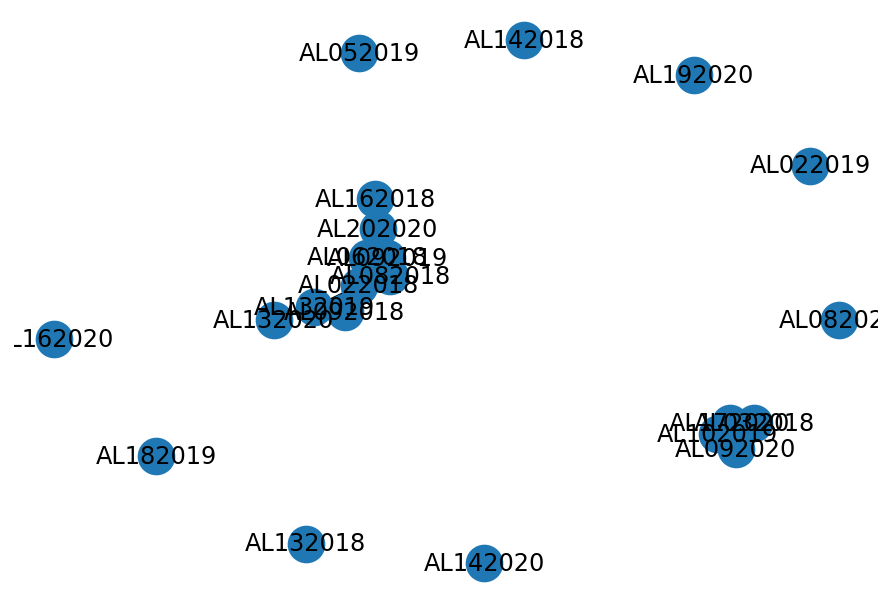

In [116]:
#create graph
G = nx.Graph()

#add nodes
G.add_nodes_from(df9.columns)

G.add_edges_from(graph)

import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

In [120]:
res.drop('index', axis=1, inplace=True)

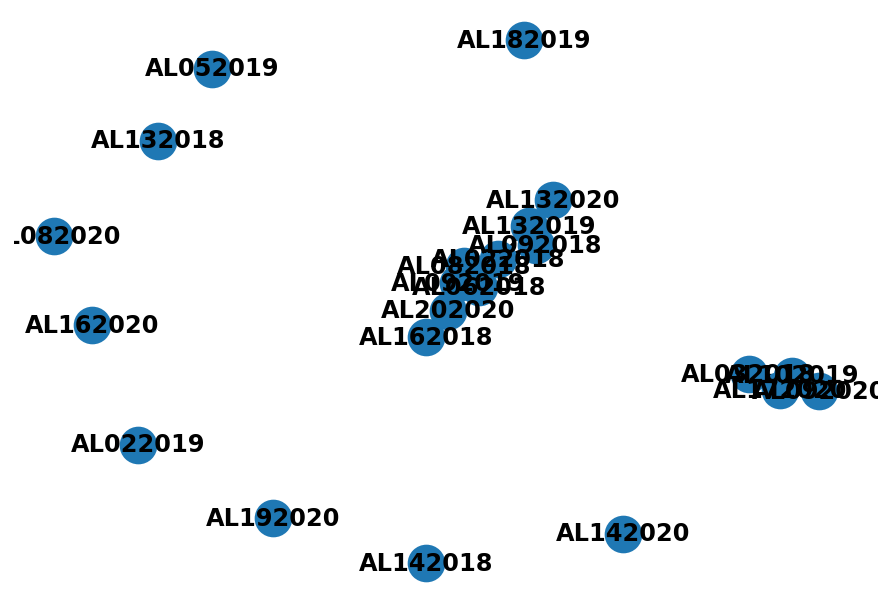

In [112]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [21]:
from scipy.stats import ranksums
import itertools

graph = []

for i in res.columns:
    boole = []
    id_s = []
    for c in res.columns:
        if i == c:
            pass
        else:
            w, p = ranksums(res[i], res[c], alternative='two-sided')
            if p < 0.05:
                p = 0
            else:
                p = 1
            boole.append(p)
            id_s.append(c)
    fish = tuple(itertools.compress(id_s, boole))
    if len(fish) <= 1:
        pass
    elif len(fish)==2:
        graph.append(fish)
    else:
        fishes = list(itertools.combinations(fish, 2))
        for j in fishes:
            graph.append(j)

In [122]:
graph

[('AL092019', 'AL132018'),
 ('AL092019', 'AL132019'),
 ('AL092019', 'AL192020'),
 ('AL092019', 'AL202020'),
 ('AL092019', 'AL262020'),
 ('AL092019', 'AL272020'),
 ('AL092019', 'AL292020'),
 ('AL132018', 'AL132019'),
 ('AL132018', 'AL192020'),
 ('AL132018', 'AL202020'),
 ('AL132018', 'AL262020'),
 ('AL132018', 'AL272020'),
 ('AL132018', 'AL292020'),
 ('AL132019', 'AL192020'),
 ('AL132019', 'AL202020'),
 ('AL132019', 'AL262020'),
 ('AL132019', 'AL272020'),
 ('AL132019', 'AL292020'),
 ('AL192020', 'AL202020'),
 ('AL192020', 'AL262020'),
 ('AL192020', 'AL272020'),
 ('AL192020', 'AL292020'),
 ('AL202020', 'AL262020'),
 ('AL202020', 'AL272020'),
 ('AL202020', 'AL292020'),
 ('AL262020', 'AL272020'),
 ('AL262020', 'AL292020'),
 ('AL272020', 'AL292020'),
 ('AL022018', 'AL022019'),
 ('AL022018', 'AL032018'),
 ('AL022018', 'AL082020'),
 ('AL022018', 'AL092018'),
 ('AL022018', 'AL092020'),
 ('AL022018', 'AL102019'),
 ('AL022018', 'AL132020'),
 ('AL022018', 'AL142018'),
 ('AL022018', 'AL142020'),
 

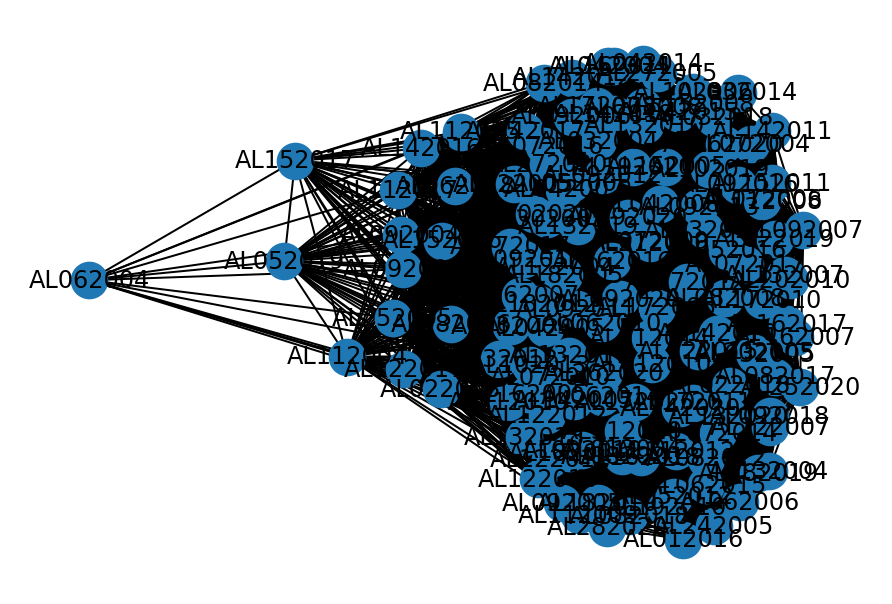

In [24]:
#create graph
G = nx.Graph()

#add nodes
G.add_nodes_from(res.columns)

G.add_edges_from(graph)

import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

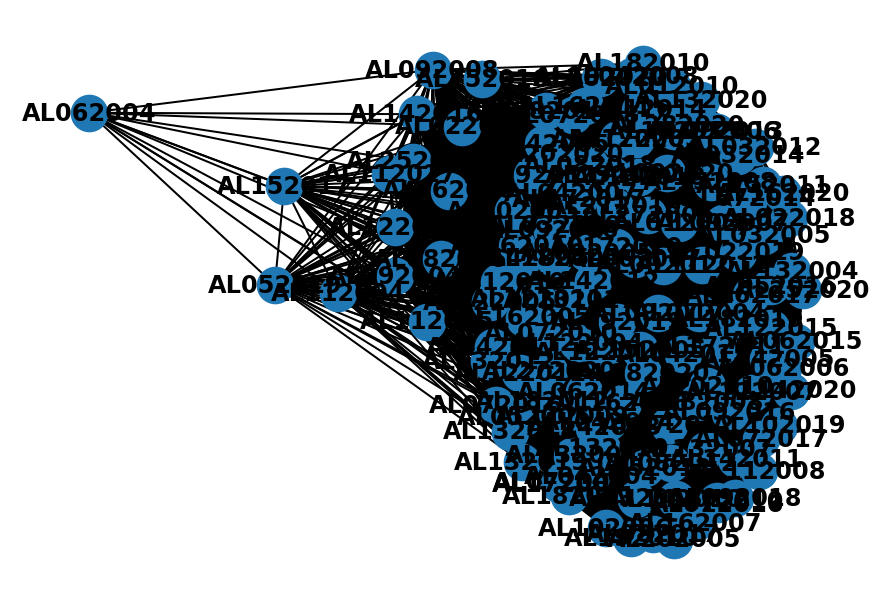

In [25]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [29]:
#The outliers for the years 2004 to 2020 are

outliers = ['AL142016', 'AL112017', 'AL122017', 'AL052019', 'AL152017', 'AL062004']

fig = go.Figure()

# Add traces

for outlier in outliers:
    fig.add_trace(go.Scatter(y=res[outlier],
                        mode='lines',
                        name=outlier))

fig.update_layout(
    title_text='Forward Motion of Atlantic Hurricanes (2004 - 2020)', # title of plot
    xaxis_title_text='Index', # xaxis label
    yaxis_title_text='kph', # yaxis label
)

fig.show()

In [ ]:
from scipy.stats import ranksums

graph = {}

for i in res.columns:
    storm_Stat = {}
    for c in res.columns:
        if i == c:
            pass
        else:
            w, p = ranksums(res[i], res[c], alternative='two-sided')
            if p < 0.05:
                p = 0
            else:
                p = 1
            storm_Stat[c] = p
    graph[i] = storm_Stat
    

In [ ]:
keys = list(tel.keys())
values = list(tel.values())

In [ ]:
#create graph
G = nx.Graph()

#add nodes
G.add_nodes_from(res.columns)

In [2]:
pip install networkx

     |████████████████████████████████| 1.9 MB 4.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import numpy as nd
import numpy.ma as ma

In [ ]:
compress('ABCDEF', [1,0,1,0,1,1])

In [ ]:
import numpy as np
import numpy as nd
import numpy.ma as ma

y = [colour_dates != 'Violet']

zd = nd.ma.masked_array(category,y)
zd=zd.tolist()
a = zd.count('Political Unrest')
b = zd.count('Terrorism')
c = zd.count('War')
d = zd.count('Natural disaster')
e = zd.count('Technological Innovation')
f = zd.count('Manmade disaster')
g = zd.count('Transportation disaster')
h = zd.count('Political agreement')
i = zd.count('Financial crash')
j = zd.count('Political change')


elimin8 = [diff2 != max_clicks2]
        mask2 = ma.masked_array(button, elimin8)
        mask2=mask2.tolist()
        result= [i for i in mask2 if i is not None]
        if result[0] == 'button1':
            json.dump(clicks3, outfile)

In [9]:
y = [1,2,3,4,2,4,5,3]
p = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
elimin8 = [max(y) != 5]
mask2 = ma.masked_array(p, elimin8)
mask2=mask2.tolist()
res= [i for i in mask2 if i is not None]
res

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

In [ ]:
#create graph
G = nx.Graph()

#add nodes
G.add_nodes_from(res.columns)


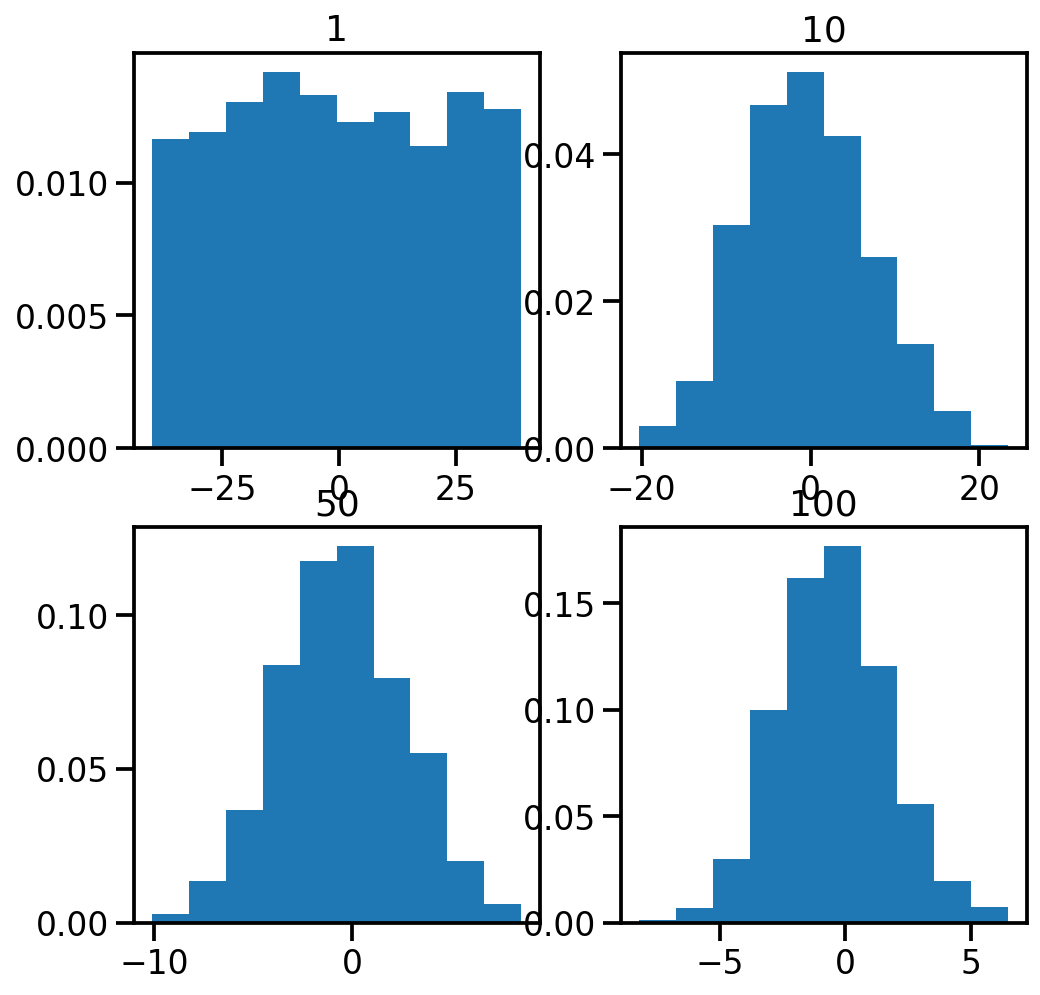

In [107]:
import numpy
import matplotlib.pyplot as plt

# number of sample
num = [1, 10, 50, 100]
# list of sample means
means = []

# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
	# Generating seed so that we can get same result
	# every time the loop is run...
	numpy.random.seed(1)
	x = [numpy.mean(
		numpy.random.randint(
			-40, 40, j)) for _i in range(1000)]
	means.append(x)
k = 0

# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
	for j in range(0, 2):
		# Histogram for each x stored in means
		ax[i, j].hist(means[k], 10, density = True)
		ax[i, j].set_title(label = num[k])
		k = k + 1
plt.show()
